In [1]:
# import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# cc1 paths for currents dwells features extracted for CNN training with CC or CT contexts
cc1_CCreads_filepath = "/lustre/bio_running/C_to_U_editing_minimap2_spliced/cc1.T_C_reference_currents_dwells_features_reads/CCcontext_reads_currents_dwells_reads_forward.tsv"
cc1_CTreads_filepath = "/lustre/bio_running/C_to_U_editing_minimap2_spliced/cc1.T_C_reference_currents_dwells_features_reads/CTcontext_reads_currents_dwells_reads_forward_rev.tsv"

In [3]:
columns = ["contig", "pos1based", "read_name", "strand", "cur-3", "cur-2", "cur-1", "cur0", "cur+1", "cur+2", "cur+3", "dw-3", "dw-2", "dw-1", "dw0", "dw+1", "dw+2", "dw+3", "label"]
df_CC = pd.read_table(cc1_CCreads_filepath, header=None)
df_CC["Label"] = ["CCcontext" for i in range(df_CC.shape[0])]
df_CC.columns = columns
df_CC

,contig,pos1based,read_name,strand,cur-3,cur-2,cur-1,cur0,cur+1,cur+2,cur+3,dw-3,dw-2,dw-1,dw0,dw+1,dw+2,dw+3,label
0,chr1,47,06587ab2-0a88-484e-9764-56b7986cd63c,+,122.648,86.356,99.492,111.880,83.211,96.846,119.004,13.0,7.0,375.0,187.0,54.0,125.0,84.0,CCcontext
1,chr1,55,06587ab2-0a88-484e-9764-56b7986cd63c,+,99.471,79.993,88.935,108.204,113.271,109.143,NaN,68.0,41.0,301.0,17.0,19.0,45.0,NaN,CCcontext
2,chr1,61,06587ab2-0a88-484e-9764-56b7986cd63c,+,NaN,NaN,74.645,78.280,89.183,106.105,110.519,NaN,NaN,51.0,73.0,116.0,27.0,11.0,CCcontext
3,chr1,62,06587ab2-0a88-484e-9764-56b7986cd63c,+,NaN,74.645,78.280,89.183,106.105,110.519,118.067,NaN,51.0,73.0,116.0,27.0,11.0,37.0,CCcontext
4,chr1,69,06587ab2-0a88-484e-9764-56b7986cd63c,+,79.011,71.166,70.220,83.495,96.623,87.154,77.796,27.0,13.0,10.0,119.0,20.0,11.0,123.0,CCcontext
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133569,chr4,2719,7a089806-e082-40ec-9308-e7350115a568,+,126.011,78.118,79.170,87.521,86.575,87.882,102.913,62.0,68.0,19.0,55.0,65.0,15.0,12.0,CCcontext
11133570,chr4,2722,7a089806-e082-40ec-9308-e7350115a568,+,87.521,86.575,87.882,102.913,105.675,102.896,92.267,55.0,65.0,15.0,12.0,75.0,69.0,18.0,CCcontext
11133571,chr4,2723,7a089806-e082-40ec-9308-e7350115a568,+,86.575,87.882,102.913,105.675,102.896,92.267,78.980,65.0,15.0,12.0,75.0,69.0,18.0,10.0,CCcontext
11133572,chr4,2727,7a089806-e082-40ec-9308-e7350115a568,+,102.896,92.267,78.980,114.876,119.788,129.554,112.052,69.0,18.0,10.0,54.0,31.0,41.0,19.0,CCcontext


In [4]:
df_CT = pd.read_table(cc1_CTreads_filepath, header=None)
df_CT["Label"] = ["CTcontext" for i in range(df_CT.shape[0])]
df_CT.columns = columns
df_CT

,contig,pos1based,read_name,strand,cur-3,cur-2,cur-1,cur0,cur+1,cur+2,cur+3,dw-3,dw-2,dw-1,dw0,dw+1,dw+2,dw+3,label
0,chr1,181,06587ab2-0a88-484e-9764-56b7986cd63c,+,96.225,82.086,88.192,97.785,100.618,87.386,89.962,24.0,17.0,9.0,87.0,39.0,7.0,35.0,CTcontext
1,chr1,278,06587ab2-0a88-484e-9764-56b7986cd63c,+,87.375,84.080,83.071,104.363,79.904,79.564,86.683,9.0,38.0,24.0,104.0,12.0,26.0,19.0,CTcontext
2,chr1,303,06587ab2-0a88-484e-9764-56b7986cd63c,+,100.598,83.780,74.217,73.119,72.569,77.432,82.559,9.0,7.0,117.0,22.0,119.0,11.0,155.0,CTcontext
3,chr1,527,06587ab2-0a88-484e-9764-56b7986cd63c,+,76.890,NaN,89.288,92.533,87.394,109.803,107.594,16.0,NaN,123.0,26.0,91.0,19.0,42.0,CTcontext
4,chr1,730,06587ab2-0a88-484e-9764-56b7986cd63c,+,112.476,91.498,89.197,111.194,112.454,118.441,114.358,74.0,20.0,24.0,10.0,12.0,8.0,32.0,CTcontext
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276014,chr4,2404,ec265e88-e3df-4f80-8021-080c28856aca,-,108.200,78.680,89.928,102.234,85.921,97.140,NaN,17.0,8.0,38.0,33.0,30.0,8.0,NaN,CTcontext
276015,chr4,2407,ec265e88-e3df-4f80-8021-080c28856aca,-,86.467,95.926,91.993,108.200,78.680,89.928,102.234,29.0,32.0,20.0,17.0,8.0,38.0,33.0,CTcontext
276016,chr4,2496,ec265e88-e3df-4f80-8021-080c28856aca,-,101.279,78.292,88.181,96.834,81.320,103.518,NaN,31.0,27.0,15.0,31.0,90.0,22.0,NaN,CTcontext
276017,chr4,2675,ec265e88-e3df-4f80-8021-080c28856aca,-,80.195,85.849,100.453,121.128,74.596,88.549,103.108,7.0,11.0,87.0,22.0,50.0,195.0,27.0,CTcontext


In [5]:
# drop reads with nan
df_CC.dropna(inplace=True, axis=0)
df_CT.dropna(inplace=True, axis=0)

# select only forward reads for CT contexts reads
df_CT = df_CT.query("strand == '+'")

# concat into a unique dataframe
df = pd.concat([df_CC, df_CT])

#delete staring df CC and CT
del(df_CC)
del(df_CT)

# reset index
df.reset_index(drop=True, inplace=True)

# print final dataframe
df

,contig,pos1based,read_name,strand,cur-3,cur-2,cur-1,cur0,cur+1,cur+2,cur+3,dw-3,dw-2,dw-1,dw0,dw+1,dw+2,dw+3,label
0,chr1,47,06587ab2-0a88-484e-9764-56b7986cd63c,+,122.648,86.356,99.492,111.880,83.211,96.846,119.004,13.0,7.0,375.0,187.0,54.0,125.0,84.0,CCcontext
1,chr1,69,06587ab2-0a88-484e-9764-56b7986cd63c,+,79.011,71.166,70.220,83.495,96.623,87.154,77.796,27.0,13.0,10.0,119.0,20.0,11.0,123.0,CCcontext
2,chr1,70,06587ab2-0a88-484e-9764-56b7986cd63c,+,71.166,70.220,83.495,96.623,87.154,77.796,77.956,13.0,10.0,119.0,20.0,11.0,123.0,56.0,CCcontext
3,chr1,74,06587ab2-0a88-484e-9764-56b7986cd63c,+,87.154,77.796,77.956,79.395,77.239,80.401,80.177,11.0,123.0,56.0,12.0,10.0,8.0,69.0,CCcontext
4,chr1,76,06587ab2-0a88-484e-9764-56b7986cd63c,+,77.956,79.395,77.239,80.401,80.177,92.205,79.450,56.0,12.0,10.0,8.0,69.0,15.0,25.0,CCcontext
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923507,chr4,2518,36e07674-bf60-42b1-9155-7c4ce76586ad,+,75.535,73.914,75.791,82.884,93.028,100.126,76.184,34.0,10.0,61.0,27.0,41.0,23.0,29.0,CTcontext
9923508,chr4,2556,2b8f70d1-6706-4971-8203-1e38cda709b6,+,73.867,76.699,67.906,72.464,75.045,79.497,74.078,82.0,22.0,167.0,22.0,265.0,36.0,30.0,CTcontext
9923509,chr4,2636,2b8f70d1-6706-4971-8203-1e38cda709b6,+,100.673,95.558,80.517,95.124,95.731,119.002,105.450,12.0,19.0,43.0,49.0,16.0,29.0,61.0,CTcontext
9923510,chr4,2665,2b8f70d1-6706-4971-8203-1e38cda709b6,+,77.811,78.957,89.481,97.020,88.584,105.299,97.779,10.0,16.0,26.0,15.0,20.0,7.0,43.0,CTcontext


In [6]:
# drop dwells 
df = df[("contig	pos1based	read_name	strand	cur-3	cur-2	cur-1	cur0	cur+1	cur+2	cur+3".split("\t")+["label"])].copy()
df

,contig,pos1based,read_name,strand,cur-3,cur-2,cur-1,cur0,cur+1,cur+2,cur+3,label
0,chr1,47,06587ab2-0a88-484e-9764-56b7986cd63c,+,122.648,86.356,99.492,111.880,83.211,96.846,119.004,CCcontext
1,chr1,69,06587ab2-0a88-484e-9764-56b7986cd63c,+,79.011,71.166,70.220,83.495,96.623,87.154,77.796,CCcontext
2,chr1,70,06587ab2-0a88-484e-9764-56b7986cd63c,+,71.166,70.220,83.495,96.623,87.154,77.796,77.956,CCcontext
3,chr1,74,06587ab2-0a88-484e-9764-56b7986cd63c,+,87.154,77.796,77.956,79.395,77.239,80.401,80.177,CCcontext
4,chr1,76,06587ab2-0a88-484e-9764-56b7986cd63c,+,77.956,79.395,77.239,80.401,80.177,92.205,79.450,CCcontext
...,...,...,...,...,...,...,...,...,...,...,...,...
9923507,chr4,2518,36e07674-bf60-42b1-9155-7c4ce76586ad,+,75.535,73.914,75.791,82.884,93.028,100.126,76.184,CTcontext
9923508,chr4,2556,2b8f70d1-6706-4971-8203-1e38cda709b6,+,73.867,76.699,67.906,72.464,75.045,79.497,74.078,CTcontext
9923509,chr4,2636,2b8f70d1-6706-4971-8203-1e38cda709b6,+,100.673,95.558,80.517,95.124,95.731,119.002,105.450,CTcontext
9923510,chr4,2665,2b8f70d1-6706-4971-8203-1e38cda709b6,+,77.811,78.957,89.481,97.020,88.584,105.299,97.779,CTcontext


In [7]:
# perform pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# extract features to be used
X = df["cur-3	cur-2	cur-1	cur0	cur+1	cur+2	cur+3".split("\t")].values
y = df.label.values

# standardize dataset
std = StandardScaler()
pca = PCA()

X = std.fit_transform(X)

# perform PCA
X = pca.fit_transform(X)
X

array([[ 1.58944432e+00, -4.41298745e-01,  1.47351601e+00, ...,
         2.11422714e+00, -5.55070828e-01, -1.64024589e-01],
       [-1.38515466e+00,  4.29088826e-02, -1.12751520e+00, ...,
        -3.53307180e-01,  4.34796543e-01, -5.43532415e-02],
       [-7.37827937e-01, -1.15595792e+00, -1.66711038e+00, ...,
         9.26123503e-03,  8.26964201e-02, -1.78471864e-01],
       ...,
       [ 7.21729059e-01,  1.11547585e+00,  1.13990906e+00, ...,
        -2.43206616e-01, -5.68991294e-01, -4.08841739e-01],
       [ 4.92374999e-01,  1.55110836e-01, -7.83001296e-01, ...,
         8.66774787e-03, -8.01324244e-01, -1.16603330e-01],
       [-3.95275777e-01,  1.00902945e+00, -1.54936893e-01, ...,
        -3.76279845e-01,  1.04402990e-03, -4.72375917e-01]])

In [8]:
X.shape

(9923512, 7)

In [9]:
y

array(['CCcontext', 'CCcontext', 'CCcontext', ..., 'CTcontext',
       'CTcontext', 'CTcontext'], dtype=object)

In [10]:
# push into a pandas dataframe
X = pd.DataFrame(X, columns=[f"PC{i}" for i in range(1,pca.n_components_+1)])
X["label"] = y
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,1.589444,-0.441299,1.473516,-1.316816,2.114227,-0.555071,-0.164025,CCcontext
1,-1.385155,0.042909,-1.127515,1.117543,-0.353307,0.434797,-0.054353,CCcontext
2,-0.737828,-1.155958,-1.667110,-0.039181,0.009261,0.082696,-0.178472,CCcontext
3,-1.866673,-0.611533,-0.414129,0.119775,0.116981,-0.264849,0.110939,CCcontext
4,-1.534981,-0.161211,-0.711045,0.182135,-0.460075,-0.571681,-0.082578,CCcontext
...,...,...,...,...,...,...,...,...
9923507,-0.982465,0.181724,-1.148323,0.887990,-0.607443,-0.471084,-0.036827,CTcontext
9923508,-2.844560,-0.230725,-0.945154,0.434275,-0.627665,0.002189,-0.174408,CTcontext
9923509,0.721729,1.115476,1.139909,0.033759,-0.243207,-0.568991,-0.408842,CTcontext
9923510,0.492375,0.155111,-0.783001,-0.633971,0.008668,-0.801324,-0.116603,CTcontext


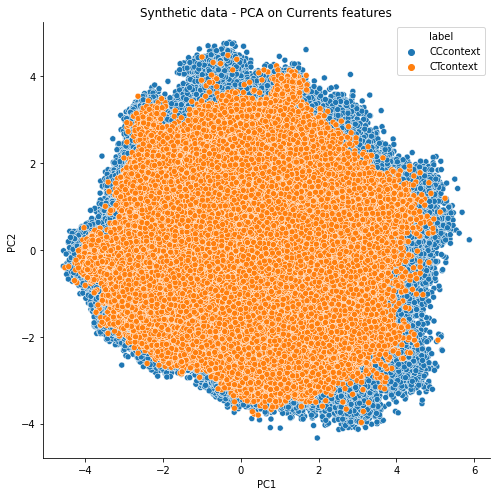

In [22]:
plt.figure(figsize=(7,7))
sn.scatterplot(data=X, x="PC1", y="PC2", hue="label")
plt.title("Synthetic data - PCA on Currents features")
sn.despine()
plt.tight_layout()
plt.show()

In [23]:
X.label.value_counts()

CCcontext    9696150
CTcontext     227362
Name: label, dtype: int64